Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64
SVM Accuracy: 0.9968399985955549
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.32      0.76      0.45        98

    accuracy                           1.00     56962
   macro avg       0.66      0.88      0.72     56962
weighted avg       1.00      1.00      1.00     56962

F1 score: 0.45121951219512196


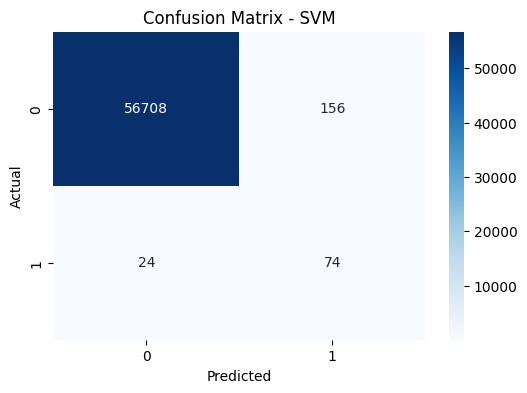

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score,f1_score,confusion_matrix

# Load dataset

df = pd.read_csv('creditcard.csv')

# Check class distribution
print("Class distribution:\n", df['Class'].value_counts())

# Split features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Model
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))
print("F1 score:",f1_score(y_test,svm_pred))
# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6,4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()
